In [ ]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import os

# tf.random.set_seed(1234)

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# let's print the shape before we reshape and normalize
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


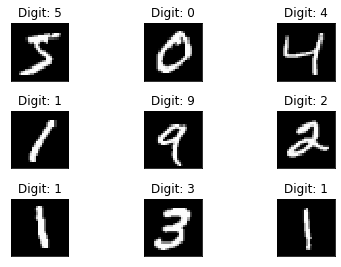

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

Text(0.5, 1.0, 'Pixel Value Distribution')

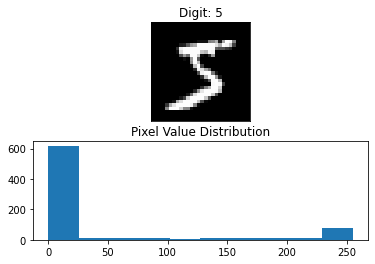

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(x_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(x_train[1].reshape(784))
plt.title("Pixel Value Distribution")

In [ ]:
import numpy as np
tmp_input = np.arange(60).reshape(10,6).astype(np.float32)

print(tmp_input)

[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35.]
 [36. 37. 38. 39. 40. 41.]
 [42. 43. 44. 45. 46. 47.]
 [48. 49. 50. 51. 52. 53.]
 [54. 55. 56. 57. 58. 59.]]


In [ ]:
drop_layer = tf.keras.layers.Dropout(rate=0.3)
drop_layer(tmp_input, training=False)

<tf.Tensor: shape=(10, 6), dtype=float32, numpy=
array([[ 0.,  1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17.],
       [18., 19., 20., 21., 22., 23.],
       [24., 25., 26., 27., 28., 29.],
       [30., 31., 32., 33., 34., 35.],
       [36., 37., 38., 39., 40., 41.],
       [42., 43., 44., 45., 46., 47.],
       [48., 49., 50., 51., 52., 53.],
       [54., 55., 56., 57., 58., 59.]], dtype=float32)>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100352    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

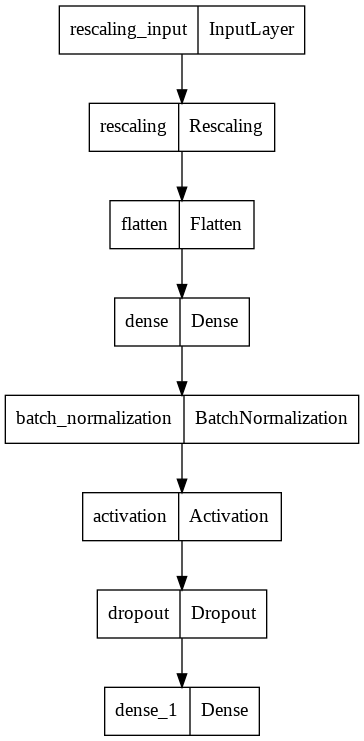

In [ ]:
from tensorflow.keras.utils import plot_model

# Build a simpl1e model
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(scale=1.0/255, input_shape=(28, 28)))
model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, use_bias=False))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
plot_model(model,to_file='multilayer_perceptron_graph.png')


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])



In [ ]:


# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10, callbacks=callbacks)

Fit on NumPy data
Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2861 - sparse_categorical_accuracy: 0.9172
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1602 - sparse_categorical_accuracy: 0.9527
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1308 - sparse_categorical_accuracy: 0.9613
Epoch 4/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1161 - sparse_categorical_accuracy: 0.9658
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1012 - sparse_categorical_accuracy: 0.9689
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0950 - sparse_categorical_accuracy: 0.9718
Epoch 7/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0906 - sparse_categorical_accuracy: 0.9728
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.0844 - sparse_categorical_accuracy: 0.9752
Epoch 9/10
938/938 [==========

In [ ]:
#history.history
print(history.history)


{'loss': [0.2539790868759155, 0.11044271290302277, 0.07856053858995438, 0.060520123690366745, 0.04859111085534096, 0.03891830891370773, 0.031781215220689774, 0.026446493342518806, 0.021951107308268547, 0.018425531685352325], 'sparse_categorical_accuracy': [0.92535001039505, 0.9665833115577698, 0.9762333035469055, 0.9815333485603333, 0.9854333400726318, 0.9881500005722046, 0.990149974822998, 0.9916499853134155, 0.9933666586875916, 0.9944000244140625]}


In [ ]:
print(history.history['loss'])
print(history.history['sparse_categorical_accuracy'])

[0.2539790868759155, 0.11044271290302277, 0.07856053858995438, 0.060520123690366745, 0.04859111085534096, 0.03891830891370773, 0.031781215220689774, 0.026446493342518806, 0.021951107308268547, 0.018425531685352325]
[0.92535001039505, 0.9665833115577698, 0.9762333035469055, 0.9815333485603333, 0.9854333400726318, 0.9881500005722046, 0.990149974822998, 0.9916499853134155, 0.9933666586875916, 0.9944000244140625]


In [ ]:
result = model.evaluate(x_test, y_test, verbose=2)
print(result)

313/313 - 1s - loss: 0.0916 - sparse_categorical_accuracy: 0.9802
[0.09157665073871613, 0.9801999926567078]


In [ ]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", np.argmax(predictions, axis=1))


Generate predictions for 3 samples
predictions shape: [7 2 1]


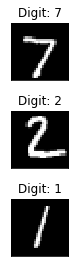

In [ ]:
fig = plt.figure()
for i in range(3):
  plt.subplot(3,1,i+1)
  plt.tight_layout()
  plt.imshow(x_test[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(np.argmax(predictions[i])))
  plt.xticks([])
  plt.yticks([])

In [ ]:
# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train1 = x_train[:-10000]
y_train1 = y_train[:-10000]

In [ ]:
%load_ext tensorboard
import os
import datetime
# os.mkdir("logs")
# os.mkdir("logs/fit")
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
os.mkdir(log_folder)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:

from keras.callbacks import TensorBoard
callbacks = [TensorBoard(log_dir=os.path.join("content",log_folder),
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]

In [ ]:
batch_size = 64
history = model.fit(x_train1, y_train1, batch_size=batch_size, epochs=10, validation_data=(x_val,y_val), callbacks=callbacks)

Epoch 1/10
782/782 [==============================] - 5s 5ms/step - loss: 0.3083 - sparse_categorical_accuracy: 0.9099 - val_loss: 0.1620 - val_sparse_categorical_accuracy: 0.9528
Epoch 2/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1735 - sparse_categorical_accuracy: 0.9468 - val_loss: 0.1268 - val_sparse_categorical_accuracy: 0.9642
Epoch 3/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1402 - sparse_categorical_accuracy: 0.9588 - val_loss: 0.1077 - val_sparse_categorical_accuracy: 0.9701
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1195 - sparse_categorical_accuracy: 0.9640 - val_loss: 0.0977 - val_sparse_categorical_accuracy: 0.9733
Epoch 5/10
782/782 [==============================] - 4s 5ms/step - loss: 0.1077 - sparse_categorical_accuracy: 0.9678 - val_loss: 0.0933 - val_sparse_categorical_accuracy: 0.9732
Epoch 6/10
782/782 [==============================] - 4s 5ms/step - loss: 0.0969 - sparse_categorica

In [ ]:
%tensorboard --logdir=log_folder

<IPython.core.display.Javascript object>

In [ ]:
#define a method for ploting result
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

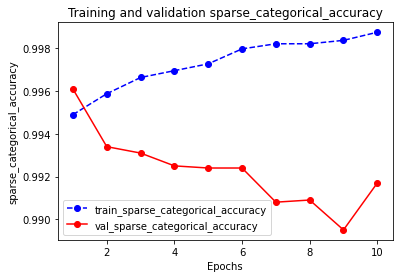

In [ ]:
plot_metric(history, 'sparse_categorical_accuracy')